<a href="https://colab.research.google.com/github/HariOS92/guvi/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [53]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

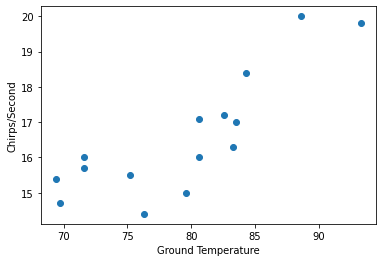

In [ ]:
plt.scatter(data=df,x='Ground Temperature',y='Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

coefficient is 3.189136692331094 and intercept is 26.78038426435141


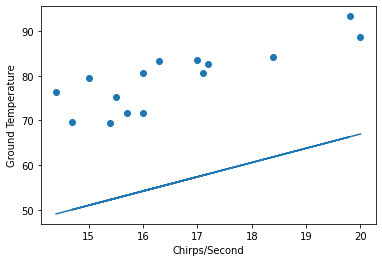

R2 score is 0.7894523339996367
Chirps/ssecond for 95 temperature according to this model is 21.391248578242525
Temperature when 18 chirps per second according to this model is 84.1848447263111


In [57]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
df.corr()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
beta1,beta0=lr.coef_[0],lr.intercept_
y_lin=beta1*x+beta1
print("coefficient is",beta1,"and intercept is",lr.intercept_)
plt.plot(x,y_lin,label="y={:.2f}x+{:.2f}".format(beta1,beta0))
plt.scatter(data=df,x='Chirps/Second',y='Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()
from sklearn.metrics import r2_score
y_pred=lr.predict(x_test)
print("R2 score is", r2_score(y_test,y_pred))
print("Chirps/ssecond for 95 temperature according to this model is",(95-beta0)/beta1)
print("Temperature when 18 chirps per second according to this model is",lr.predict([[18]])[0])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [37]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


Linear equation is 0.8284889793870766x+11.54250679819038


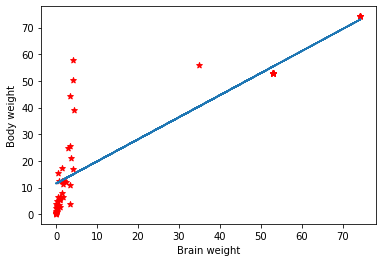

R2 score is 0.9552669221861272


In [39]:
df.count()
brain_mean=df['Brain'].mean()
body_mean=df['Body'].mean()
df.loc[df['Brain']>brain_mean]=brain_mean
df.loc[df['Body']>body_mean]=body_mean
x1=df.iloc[:,:-1].values
y1=df.iloc[:,-1].values
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25)
lr1=linear_model.LinearRegression()
lr1.fit(x1_train,y1_train)
print("Linear equation is "+str(lr1.coef_[0])+"x+"+str(lr1.intercept_))
y_lin=lr1.coef_[0]*x1+lr1.intercept_
plt.plot(x1,y_lin,label="y={:.2f}x+{:.2f}".format(lr1.coef_[0],lr1.intercept_))
plt.scatter(x1,y1,c="r",marker="*")
plt.xlabel("Brain weight")
plt.ylabel("Body weight")
plt.show()
y1_pred=lr1.predict(x1_test)
print("R2 score is",metrics.r2_score(y1_test,y1_pred))

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [42]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()
df.count()

Sex       52
Rank      52
Year      52
Degree    52
YSdeg     52
Salary    52
dtype: int64

Linear equation is 1447.5985422903768x+10718.653304151492
R2 score is 0.21741809065072104
Sex
0    38
1    14
Name: Salary, dtype: int64


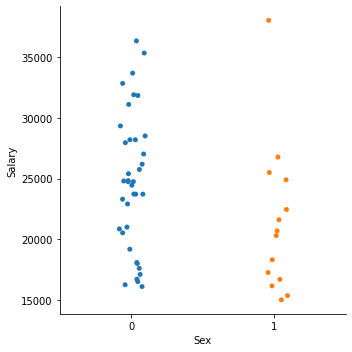

In [52]:
x2=df.iloc[:,:-1].values
y2=df.iloc[:,-1].values
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2)
lr2=linear_model.LinearRegression()
lr2.fit(x2_train,y2_train)
print("Linear equation is "+str(lr2.coef_[0])+"x+"+str(lr2.intercept_))
y2_pred=lr2.predict(x2_test)
print("R2 score is",metrics.r2_score(y_test,y_pred))
#plt.scatter(data=df,x="Sex",y="Salary")
#plt.xlabel("Sex")
#plt.ylabel("Salary")
#plt.show()
print(df['Salary'].groupby(df['Sex']).count())
import seaborn as sns
sns.catplot(data=df,x="Sex",y="Salary")

From the above count and plot between sex and salary shows that sex with value 0 (Male) gets higher salary compared to sex with value 1 (Female)